# Feature Detection Tutorial

Feature detection is the process of scanning computer images to extract bits of identifiable pieces of information. There is no exact universal definition on what constitutes a feature but we can define certain type of features such as edges, corners and blobs (ROI).

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [29]:
def printImage(img):
    plt.rcParams["figure.figsize"] = (18,13)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


<b style="font-size:18px;">Exercise 1.0 - Corner Harris</b>

Using opencv research how to use cv2.cornerHarris() function. 

Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the corner Harris function to extract features from the image. 


Certain algorithms that we covered today’s tutorial might be covered by a license which will not allow you to use to algorithm. As we are using this for research you might need to download opencv-contrib

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
">link</a>






In [33]:
def cornerHarris(img):
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayImg = np.float32(grayImg)

    dst = cv2.cornerHarris(grayImg,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,255,0]
    return img

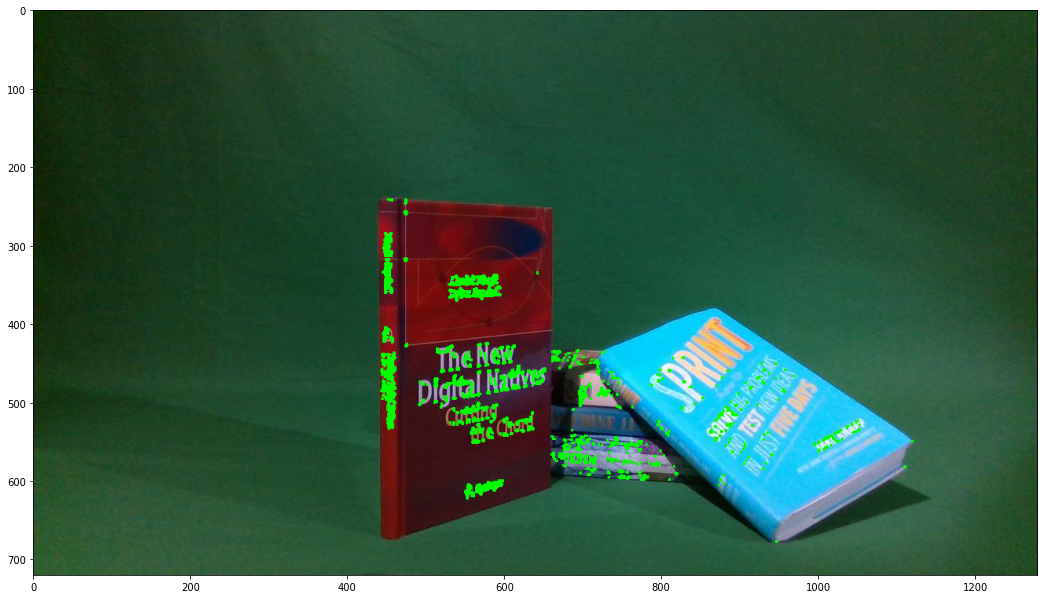

In [34]:
img = cv2.imread("Images/3_colour.jpeg")
img2 = cornerHarris(img)

printImage(img2)

<b style="font-size:18px;">Exercise 1.1 - Shi-Tomasi Corner Detector</b>

Using opencv research how to use cv2.goodFeaturesToTrack() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the Shi-Tomasi Corner Detector to extract features from the image. 
<a href="https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
">link</a>


In [36]:
def shiTomasi(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,255,-1)
    
    return img

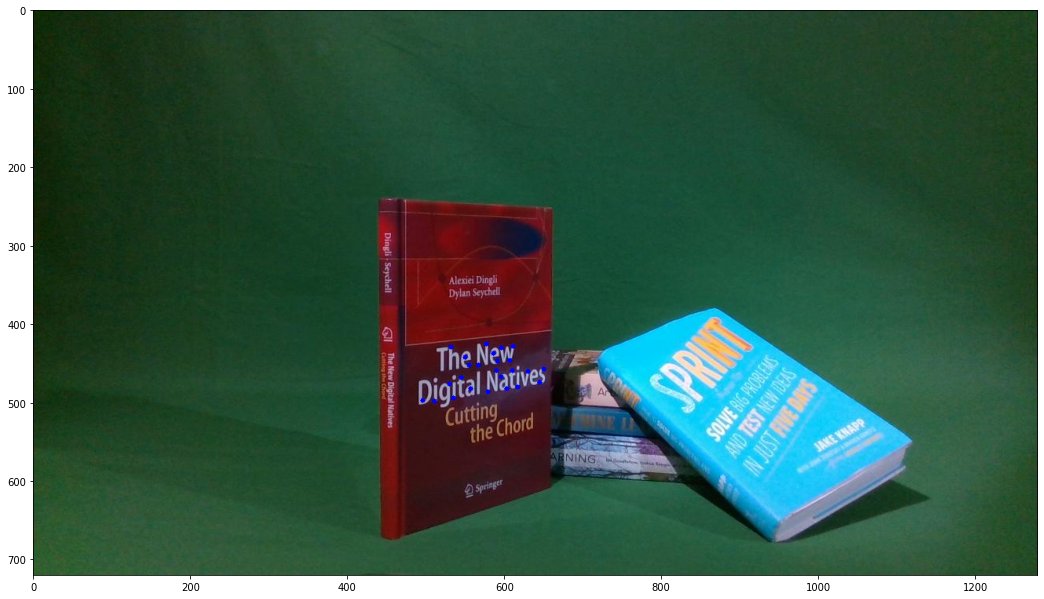

In [37]:
img = cv2.imread('Images/3_colour.jpeg')
img2 = shiTomasi(img)

printImage(img2)

<b style="font-size:18px;">Exercise 1.2 - SIFT</b>

Using opencv research how to use cv2.xfeatures2d.SIFT_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SIFT function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
">link
</a>


In [39]:
def SIFT(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)

    return kp, des

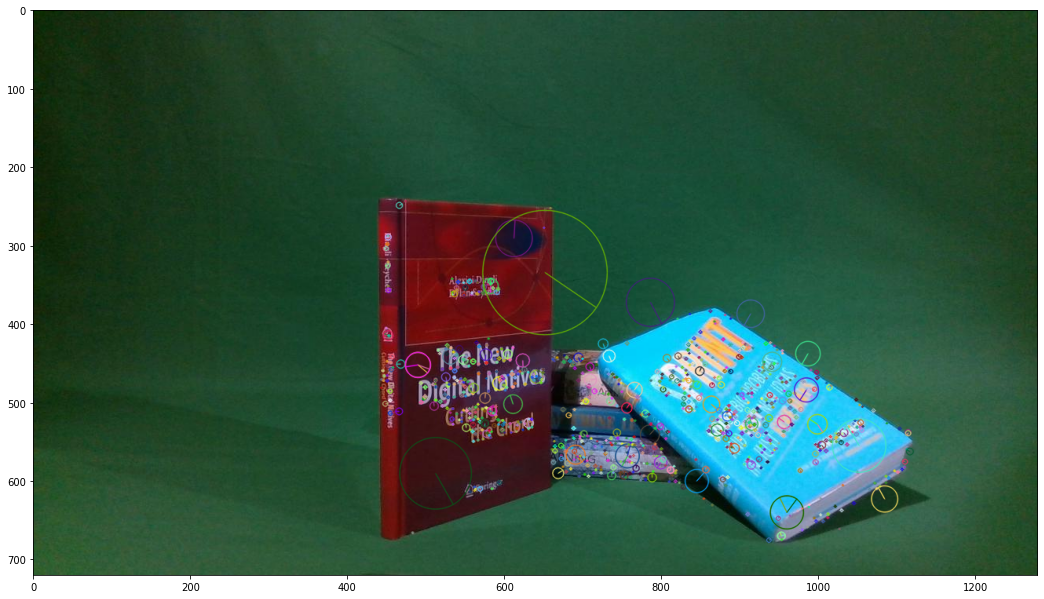

In [40]:
img = cv2.imread('Images/3_colour.jpeg')
kp, des = SIFT(img)

img2 = cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
printImage(img2)

<b style="font-size:18px;">Exercise 1.3 - SURF</b>

Using opencv research how to use cv2.xfeatures2d.SURF_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SURF function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17

    </i>
<a href="https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html
">link</a>

In [6]:
img = cv2.imread('Images/3_colour.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)

img = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


<b style="font-size:18px;">Exercise 1.4 - ORB</b>

Using opencv research how to use cv2.ORB_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply ORB function to extract features from the image. 
<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17

    </i>
<a href="https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html
">link</a>


In [10]:
# Calculates the ORB function on a given image
def ORB(img):
    orb = cv2.ORB_create()
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)

    return kp, des # returns the descriptors and keypoints in an image 

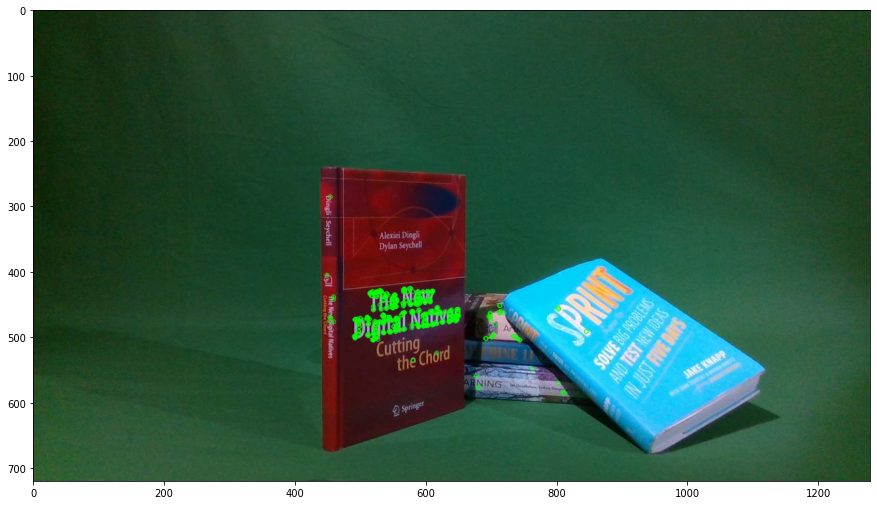

In [11]:
img = cv2.imread('Images/3_colour.jpeg')

kp, des = ORB(img)
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

At this point we went through a number of different feature detectors and created the feature points that describe interesting and unique features within the image. <br>
In the next exercise research how to use the following matching method cv2.BFMatcher() to find the matching images.
Create a program that given two images it matches the features between the images (<a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/2_colour.jpeg">use the colour_2.jpeg as well as the image used from the previous exercises from the same repository in the COTS dataset</a>).<br>
Document the difference between the different detectors to show which one gave you the best accuracy. 

<a href="https://docs.opencv.org/4.x/d3/da1/classcv_1_1BFMatcher.html">link></a>

In [25]:
def featureDetection(feature, image, technique):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    kp1, desc1 = technique(image)
    kp2, desc2 = technique(feature)

    matchDesc = bf.match(desc1, desc2)
    matchDesc = sorted(matchDesc, key = lambda x:x.distance)
    img3 = np.array(image)
    return cv2.drawMatches(image,kp1,feature,kp2,matchDesc[:10], img3, flags=2)


In [41]:
img1 = cv2.imread('Images/2_colour.jpeg')
img2 = cv2.imread('Images/3_colour.jpeg')

# SIFT Feature Detection
output = featureDetection(img1, img2, SIFT)
printImage(output)

# ORB Feature Detection
output = featureDetection(img1, img2, ORB)
printImage(output)




error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'cv::batchDistance'
